In [49]:
import pandas as pd

In [50]:
RPSALE = pd.read_csv('data/EXTR_RPSale.csv', low_memory=False)

In [51]:
RPSALE.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2642952,720319,0520,11/20/2013,699950,20131126001594,,,,,...,2,6,3,N,N,N,N,1,8,
1,1381073,154580,1220,06/16/1994,125000,199406211626,089,011,154580,P,...,3,6,2,N,N,N,N,1,8,
2,2496482,356730,0045,06/09/2011,542200,20110617001045,,,,,...,3,6,3,,,,,1,8,
3,1970507,252505,9206,06/25/2003,443000,20030702002332,,,,,...,3,6,3,N,N,N,N,1,8,
4,1701215,235930,0072,07/08/1999,225000,19990730000822,,,,,...,3,6,3,N,N,N,N,1,8,


In [52]:
RPSALE['MergeID'] = RPSALE['Major']+RPSALE['Minor']

In [53]:
len(RPSALE)

1928494

In [54]:
RPSALE_TEST = RPSALE.drop_duplicates(subset='MergeID')

In [55]:
len(RPSALE_TEST)

662074

In [56]:
COMBUILD = pd.read_csv('data/EXTR_CommBldg.csv', low_memory=False)

In [57]:
COMBUILD.head()

,Major,Minor,BldgNbr,NbrBldgs,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,BldgQuality,BldgDescr,BldgGrossSqFt,BldgNetSqFt,YrBuilt,EffYr,PcntComplete,HeatingSystem,Sprinklers,Elevators
0,192105,9114,1,1,1407 AUBURN WAY S ...,1407,,,AUBURN,WAY,...,4,RETAIL ...,21296,21296,1967,1980,100,6,N,
1,212206,9057,3,1,24409 WITTE RD SE...,24409,,,WITTE,RD,...,4,Duplex ...,1248,1248,1960,1990,100,1,,
2,384610,10,1,2,927 N 100TH ST ...,927,,N,100TH,ST,...,4,SEATTLE HOUSING AUTH ...,7892,7892,1986,1991,100,2,N,N
3,881640,755,1,1,5229 UNIVERSITY WAY NE...,5229,,,UNIVERSITY,WAY,...,4,OFFICE & APTS ...,2274,2274,1963,1974,100,1,N,
4,30351,60,1,1,1519 WEST VALLEY HWY N ...,1519,,,WEST VALLEY,HWY,...,4,OFFICE BLDG ...,20428,16288,1993,1999,100,11,Y,


In [58]:
COMBUILD['MergeID'] = COMBUILD['Major'].map(str)+COMBUILD['Minor'].map(str)

In [59]:
COMBUILD['Comm_or_Res'] = 'Comm'

In [60]:
COMBUILD = COMBUILD.drop_duplicates(subset='MergeID',keep='first')

In [61]:
first_merge = pd.merge(RPSALE, COMBUILD, how='left', on='MergeID')

In [62]:
print len(RPSALE), len(first_merge)

1928494 1928494


In [63]:
RESBUILD = pd.read_csv('data/EXTR_ResBldg.csv', low_memory=False)

In [64]:
RESBUILD['MergeID'] = RESBUILD['Major'].map(str)+RESBUILD['Minor'].map(str)
RESBUILD['Comm_or_Res'] = 'Res'
RESBUILD = RESBUILD.drop_duplicates(subset='MergeID',keep='first')
RESBUILD.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,MergeID,Comm_or_Res
0,40,1,1,1,26910 86TH AVE S 98030,26910,,,86TH,AVE,...,0,1915,0,0,0,0,3,0,401,Res
1,100,45,1,1,922 22ND ST NE 98002,922,,,22ND,ST,...,0,1952,0,0,0,0,4,0,10045,Res
2,100,90,1,2,923 28TH ST NE 98002,923,,,28TH,ST,...,0,1977,0,0,0,0,4,0,10090,Res
3,100,95,1,1,911 14TH ST NE 98002,911,,,14TH,ST,...,0,1914,0,0,0,0,4,0,10095,Res
4,120,7,1,1,17760 MARINE VIEW DR SW 98166,17760,,,MARINE VIEW,DR,...,0,1942,0,0,0,0,4,0,1207,Res


In [65]:
len(RESBUILD)

501840

In [66]:
comm_and_res = pd.merge(RESBUILD, COMBUILD, how='inner', on='MergeID')

In [67]:
comm_and_res.head()

,Major_x,Minor_x,BldgNbr_x,NbrLivingUnits,Address_x,BuildingNumber_x,Fraction_x,DirectionPrefix_x,StreetName_x,StreetType_x,...,BldgDescr,BldgGrossSqFt,BldgNetSqFt,YrBuilt_y,EffYr,PcntComplete_y,HeatingSystem,Sprinklers,Elevators,Comm_or_Res_y
0,300,100,1,1,13535 53RD AVE S 98168,13535,,,53RD,AVE,...,2 COMMERCIAL SPACES OFFICE/RETAIL ...,2389,2389,2002,2002,100,3,,,Comm
1,4100,200,1,1,14829 42ND AVE S 98168,14829,,,42ND,AVE,...,Lake Vista ...,4653,4653,1980,1988,100,2,,,Comm
2,6600,280,1,1,6031 38TH AVE SW 98126,6031,,,38TH,AVE,...,21 RESIDENTIAL UNITS 2 COML UNIT ...,4867,4867,1997,1997,100,0,,Y,Comm
3,952810,1240,1,5,,,,NaN,,,...,5 Unit Apartment ...,6172,5536,1998,1998,100,2,,,Comm
4,6600,470,1,1,6016 38TH AVE SW 98126,6016,,,38TH,AVE,...,PACIFIC PLACE SHOPPING MALL & PKG GAR. ...,779969,339784,1999,2000,100,17,Y,Y,Comm


In [68]:
len(comm_and_res)

9

In [69]:
comm_and_res_ids = comm_and_res['MergeID'].tolist()

In [70]:
sale_comm_res = pd.merge(first_merge, RESBUILD, how='left', on='MergeID')

In [71]:
sale_comm_res.head()

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpFreestanding,FpAdditional,YrBuilt_y,YrRenovated,PcntComplete_y,Obsolescence,PcntNetCondition,Condition,AddnlCost,Comm_or_Res_y
0,2642952,720319,0520,11/20/2013,699950,20131126001594,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1381073,154580,1220,06/16/1994,125000,199406211626,089,011,154580,P,...,0.0,0.0,1985.0,0.0,0.0,0.0,0.0,3.0,0.0,Res
2,2496482,356730,0045,06/09/2011,542200,20110617001045,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970507,252505,9206,06/25/2003,443000,20030702002332,,,,,...,0.0,0.0,2001.0,0.0,0.0,0.0,0.0,3.0,0.0,Res
4,1701215,235930,0072,07/08/1999,225000,19990730000822,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
print len(RPSALE), len(first_merge), len(sale_comm_res)

1928494 1928494 1928494


In [73]:
sale_comm_res[sale_comm_res['MergeID'].isin(comm_and_res_ids)]

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpFreestanding,FpAdditional,YrBuilt_y,YrRenovated,PcntComplete_y,Obsolescence,PcntNetCondition,Condition,AddnlCost,Comm_or_Res_y
103921,2858041,952810,1240,04/07/2017,20000,20170411000680,,,,,...,0.0,0.0,1996.0,0.0,0.0,0.0,0.0,3.0,0.0,Res
784415,2206600,952810,1240,05/11/2006,0,20060515000683,,,,,...,0.0,0.0,1996.0,0.0,0.0,0.0,0.0,3.0,0.0,Res


In [74]:
sale_comm_res[sale_comm_res['SalePrice'] == 0].head()

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpFreestanding,FpAdditional,YrBuilt_y,YrRenovated,PcntComplete_y,Obsolescence,PcntNetCondition,Condition,AddnlCost,Comm_or_Res_y
8,1307121,440070,0200,05/05/1993,0,199305112239,062,076,440070,P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2826129,445872,0260,10/03/2016,0,20161004000511,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2860712,408330,4150,03/15/2017,0,20170426000922,,,,,...,0.0,0.0,1906.0,0.0,0.0,0.0,0.0,4.0,0.0,Res
21,2644191,312107,9036,12/05/2013,0,20131206000531,,,,,...,0.0,0.0,1994.0,0.0,0.0,0.0,0.0,3.0,0.0,Res
24,1729614,172204,9157,12/21/1999,0,19991229001498,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
sale_comm_res['Comm_or_Res'] = sale_comm_res['Comm_or_Res_x'] + sale_comm_res['Comm_or_Res_y']

In [77]:
print len(sale_comm_res), len(RESBUILD), len(COMBUILD)

1928494 501840 32481


In [91]:
final_df_comres = sale_comm_res.loc[(sale_comm_res['Comm_or_Res_x'] == 'Comm') | (sale_comm_res['Comm_or_Res_y'] == 'Res')]

In [92]:
len(final_df_comres)

328080

In [93]:
final_df_comres['DocumentDate'] = pd.to_datetime(final_df_comres['DocumentDate'])

/Users/benjaminmalnor/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
final_df_comres['Year'] = final_df_comres['DocumentDate'].dt.year

/Users/benjaminmalnor/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
final_df_comres['Year'] = pd.to_datetime(final_df_comres['Year'])

/Users/benjaminmalnor/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
final_comm = final_df_comres[final_df_comres['Comm_or_Res_x'] == 'Comm']

In [116]:
final_comm_nozero = final_comm.loc[(final_comm['SalePrice'] != 0)]

In [118]:
final_comm_gb = final_comm_nozero.groupby(['Year'])['SalePrice'].mean()

In [124]:
final_comm_yr_count = final_comm_nozero.groupby(['Year'].dt.year)['MergeID'].count()

AttributeError: 'list' object has no attribute 'dt'

In [123]:
final_comm_yr_count

Year
1970-01-01 00:00:00.000001969      1
1970-01-01 00:00:00.000001975      2
1970-01-01 00:00:00.000001978      1
1970-01-01 00:00:00.000001980      1
1970-01-01 00:00:00.000001981      6
1970-01-01 00:00:00.000001982     82
1970-01-01 00:00:00.000001983     96
1970-01-01 00:00:00.000001984    117
1970-01-01 00:00:00.000001985    118
1970-01-01 00:00:00.000001986    198
1970-01-01 00:00:00.000001987    129
1970-01-01 00:00:00.000001988    163
1970-01-01 00:00:00.000001989    201
1970-01-01 00:00:00.000001990    201
1970-01-01 00:00:00.000001991    193
1970-01-01 00:00:00.000001992    497
1970-01-01 00:00:00.000001993    505
1970-01-01 00:00:00.000001994    538
1970-01-01 00:00:00.000001995    532
1970-01-01 00:00:00.000001996    619
1970-01-01 00:00:00.000001997    732
1970-01-01 00:00:00.000001998    694
1970-01-01 00:00:00.000001999    696
1970-01-01 00:00:00.000002000    666
1970-01-01 00:00:00.000002001    483
1970-01-01 00:00:00.000002002    491
1970-01-01 00:00:00.000002003    

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

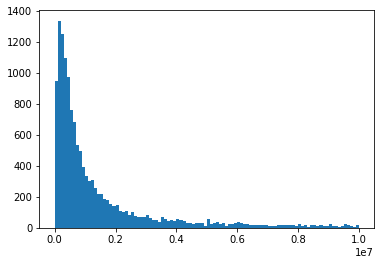

In [121]:
sale_com = final_comm_nozero[final_comm_nozero['SalePrice'] > 10000]
plt.hist(sale_com['SalePrice'], bins=100, range= (0,10000000))
plt.show()